In [1]:
import pandas as pd
import numpy as np
np.random.seed(0)
import pulp

import sys
sys.path.insert(0, '../..')
import leximin_assignment
import bottleneck_assignment
import assignment

import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
import matplotlib
matplotlib.rcParams.update({'font.size': 15})

import time
from tqdm import tqdm

import warnings

In [2]:
def get_leximin_to_eff_ratio(cost_matrix, n, utility=False):
    min_matrix = np.repeat(
        cost_matrix.min(axis=1), n
    ).reshape(cost_matrix.shape)
    increase_matrix = cost_matrix - min_matrix
    capacities = np.ones((n,))

    # Efficient assignment
    eff_assign_helper = assignment.AssignmentHelperV2(
        increase_matrix, capacities
    )

    assignments = eff_assign_helper.ip_solve()

    cost1 = eff_assign_helper.get_cost(assignments, cost_matrix=cost_matrix)
#     cost_increases = eff_assign_helper.get_cost_increases(
#         assignments, increase_matrix=increase_matrix
#     )

    # Leximin assignment
    with warnings.catch_warnings():  # temporarily suspense warnings
        warnings.simplefilter('ignore')
        leximin_helper = leximin_assignment.LeximinAssignmentHelperV2(
            increase_matrix, capacities
        )

        leximin_assignments = leximin_helper.solve(verbose=False)

    cost2 = leximin_helper.get_cost(leximin_assignments, cost_matrix=cost_matrix)
#     cost_increases = eff_assign_helper.get_cost_increases(
#         leximin_assignments, increase_matrix=increase_matrix
#     )
    
    return cost2 / cost1

def get_leximin_to_bottleneck_ratio(cost_matrix, n, utility=False):
    min_matrix = np.repeat(
        cost_matrix.min(axis=1), n
    ).reshape(cost_matrix.shape)
    increase_matrix = cost_matrix - min_matrix
    capacities = np.ones((n,))
    
    # Bottleneck assignment
    with warnings.catch_warnings():
        warnings.simplefilter('ignore')
        bottleneck_helper = bottleneck_assignment.BottleneckAssignmentHelperV2(
            increase_matrix, capacities
        )
        
        thresholds, bottleneck_assignments = bottleneck_helper.solve(verbose=False)
    
    cost1 = bottleneck_helper.get_cost(bottleneck_assignments, cost_matrix=cost_matrix)
    
    # Leximin assignment
    with warnings.catch_warnings():  # temporarily suspense warnings
        warnings.simplefilter('ignore')
        leximin_helper = leximin_assignment.LeximinAssignmentHelper(
            increase_matrix, capacities
        )

        leximin_assignments = leximin_helper.solve(verbose=False)

    cost2 = leximin_helper.get_cost(leximin_assignments)
#     cost_increases = eff_assign_helper.get_cost_increases(
#         leximin_assignments, increase_matrix=increase_matrix
#     )
    
    return cost2 / cost1

def get_bottleneck_to_eff_ratio(cost_matrix, n, utility=False):
    min_matrix = np.repeat(
        cost_matrix.min(axis=1), n
    ).reshape(cost_matrix.shape)
    increase_matrix = cost_matrix - min_matrix
    capacities = np.ones((n,))

    # Efficient assignment
    eff_assign_helper = assignment.AssignmentHelperV2(
        increase_matrix, capacities
    )

    assignments = eff_assign_helper.ip_solve()

    cost1 = eff_assign_helper.get_cost(assignments, cost_matrix=cost_matrix)
#     cost_increases = eff_assign_helper.get_cost_increases(
#         assignments, increase_matrix=increase_matrix
#     )

    # Bottleneck assignment
    with warnings.catch_warnings():
        warnings.simplefilter('ignore')
        bottleneck_helper = bottleneck_assignment.BottleneckAssignmentHelperV2(
            increase_matrix, capacities
        )
        
        thresholds, bottleneck_assignments = bottleneck_helper.solve(verbose=False)
    
    cost2 = bottleneck_helper.get_cost(bottleneck_assignments, cost_matrix=cost_matrix)
    
    return cost2 / cost1

# Verify bounds

In [3]:
n = 20

epsilon = 1e-3

cost_matrix = []
for i in range(1, n + 1):
    temp_row = []
    for j in range(1, n + 1):
        if j < i:
            temp_row.append(0)
        elif j == i:
            temp_row.append(1 - epsilon)
        else:
            temp_row.append(1)
    
    cost_matrix.append(temp_row)

cost_matrix[0][0] = 0
cost_matrix = np.array(cost_matrix)
cost_matrix

array([[0.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
        1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
        1.   , 1.   ],
       [0.   , 0.999, 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
        1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
        1.   , 1.   ],
       [0.   , 0.   , 0.999, 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
        1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
        1.   , 1.   ],
       [0.   , 0.   , 0.   , 0.999, 1.   , 1.   , 1.   , 1.   , 1.   ,
        1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
        1.   , 1.   ],
       [0.   , 0.   , 0.   , 0.   , 0.999, 1.   , 1.   , 1.   , 1.   ,
        1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
        1.   , 1.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.999, 1.   , 1.   , 1.   ,
        1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
        1.   , 1.   ],
       [0.

In [4]:
get_leximin_to_eff_ratio(cost_matrix, n)

18.981

In [5]:
get_leximin_to_bottleneck_ratio(cost_matrix, n)

1.0

In [6]:
n = 6

epsilon = 1e-3

cost_matrix = []
for i in range(1, n + 1):
    temp_row = []
    for j in range(1, n + 1):
        if j < i:
            temp_row.append(0)
        elif j == i:
            temp_row.append(1 - epsilon)
        else:
            temp_row.append(1)
    
    cost_matrix.append(temp_row)

cost_matrix[0][0] = 0
cost_matrix[0][-2] = 1 - epsilon
for i in range(1, n - 1):
    cost_matrix[i][i] -= epsilon

cost_matrix = np.array(cost_matrix)
cost_matrix

array([[0.   , 1.   , 1.   , 1.   , 0.999, 1.   ],
       [0.   , 0.998, 1.   , 1.   , 1.   , 1.   ],
       [0.   , 0.   , 0.998, 1.   , 1.   , 1.   ],
       [0.   , 0.   , 0.   , 0.998, 1.   , 1.   ],
       [0.   , 0.   , 0.   , 0.   , 0.998, 1.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.999]])

In [7]:
get_leximin_to_eff_ratio(cost_matrix, n)

4.991

In [8]:
get_leximin_to_bottleneck_ratio(cost_matrix, n)

2.497997997997998

# Experiments

In [3]:
def generate_plot(n, n_experiments, uniform_cost=False):
    NUM_BINS = 40
    
    leximin_pof = []
    leximin_ordered_pof = []
    
    for _ in tqdm(range(n_experiments)):
        if uniform_cost:
            cost_matrix = np.random.uniform(low=0, high=1, size=(n, n))
        else:
            # TODO: truncate
            cost_matrix = np.random.exponential(scale=0.5, size=(n, n))
        cost_matrix = np.round(cost_matrix, 5)
        
        leximin_ratio = get_leximin_to_eff_ratio(cost_matrix, n)
        leximin_pof.append(leximin_ratio)
        
        cost_matrix.sort(axis=1)
        leximin_ratio = get_leximin_to_eff_ratio(cost_matrix, n)
        leximin_ordered_pof.append(leximin_ratio)
        
    f, ax = plt.subplots(2, 1, figsize=(15, 20), sharex=True, sharey=True)
    
    if np.max(leximin_pof) > np.max(leximin_ordered_pof):
        ax[0].hist(leximin_pof, bins=NUM_BINS)
        leximin_bin_width = np.ptp(leximin_pof) / NUM_BINS
        ax[1].hist(
            leximin_ordered_pof,
            bins=int(round(np.ptp(leximin_ordered_pof) / leximin_bin_width))
        )
    else:
        ax[0].hist(leximin_ordered_pof, bins=NUM_BINS)
        leximin_bin_width = np.ptp(leximin_ordered_pof) / NUM_BINS
        ax[1].hist(
            leximin_pof,
            bins=int(round(np.ptp(leximin_pof) / leximin_bin_width))
        )
    
    ax[0].set_ylabel('Unordered cost matrix')
    ax[1].set_ylabel('Ordered cost matrix')
        
    return leximin_pof, leximin_ordered_pof

100%|██████████| 100/100 [03:00<00:00,  1.81s/it]


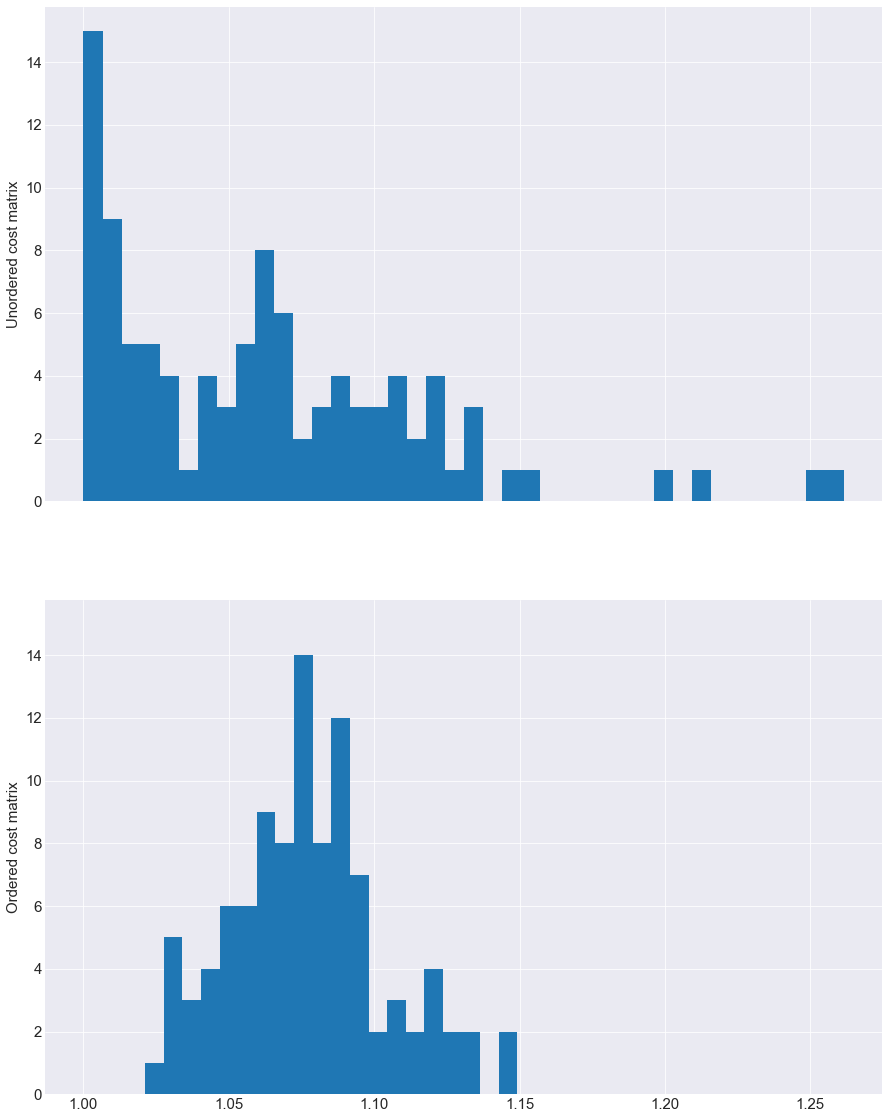

In [4]:
result = generate_plot(20, 100, uniform_cost=True)

# Application to data set

## Full data set

4 hours, to 51,861

In [23]:
df = pd.read_csv('../../data/data.csv', index_col=0)
capacity_df = df['Real'].value_counts()
types = ['ES', 'PSH', 'TH', 'RRH', 'PREV']

increase_from_best_df = df.copy()
increase_from_best_df['Best'] = increase_from_best_df[types].min(axis=1)
for type_ in types:
    increase_from_best_df[type_] = df[type_] - increase_from_best_df['Best']
    
cost_matrix = df[types].to_numpy()
increase_matrix = increase_from_best_df[types].to_numpy()
capacities = capacity_df.sort_index().to_numpy()

# Efficient assignment
print('Computing efficient assignment')

eff_assigner = assignment.AssignmentHelperV2(
    increase_matrix, capacities)
assignments = eff_assigner.ip_solve()
eff_cost = eff_assigner.get_cost(
    assignments, cost_matrix=cost_matrix)
eff_cost_increases = eff_assigner.get_cost_increases(
    assignments, increase_matrix=increase_matrix)

# Bottleneck assignment
print('Computing bottleneck assignment')

bottleneck_assigner = bottleneck_assignment.BottleneckAssignmentHelperV2(
    increase_matrix, capacities)
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    thresholds, bottleneck_assignments = bottleneck_assigner.solve(verbose=True)
bottleneck_cost = bottleneck_assigner.get_cost(
    bottleneck_assignments, cost_matrix=cost_matrix)
bottleneck_cost_increases = bottleneck_assigner.get_cost_increases(
    bottleneck_assignments, increase_matrix=increase_matrix)

# Leximin assignment
print('Computing leximin assignment')

leximin_assigner = leximin_assignment.LeximinAssignmentHelper(
    increase_matrix, capacities)
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    leximin_assignments = leximin_assigner.solve(verbose=True)
leximin_cost = leximin_assigner.get_cost(
    leximin_assignments, cost_matrix=cost_matrix)
leximin_cost_increases = leximin_assigner.get_cost_increases(
    leximin_assignments, increase_matrix=increase_matrix)

# Print out stats
print('Efficient cost:', eff_cost)
print('Efficient bottleneck:', eff_cost_increases.max())

print('Bottleneck cost:', bottleneck_cost)
print('Bottleneck bottleneck:', bottleneck_cost_increases.max())

print('Leximin cost:', leximin_cost)
print('Leximin bottleneck:', leximin_cost_increases.max())

Computing efficient assignment
Computing bottleneck assignment
Searching between 0.0 and 0.801554275
Searching between 0.09417985000000004 and 0.801554275
Searching between 0.1987406 and 0.801554275
Searching between 0.313398092 and 0.801554275
Searching between 0.40616548399999997 and 0.801554275
Searching between 0.40616548399999997 and 0.48455962599999997
Searching between 0.40616548399999997 and 0.439483239
Searching between 0.422195906 and 0.439483239
Searching between 0.430898569 and 0.439483239
Searching between 0.430898569 and 0.43493862800000005
Searching between 0.430898569 and 0.43314850200000005
Searching between 0.4320012750000001 and 0.43314850200000005
Searching between 0.4320012750000001 and 0.432561553
Searching between 0.4320012750000001 and 0.4323181039999999
Searching between 0.4320012750000001 and 0.4321277969999999
Searching between 0.4320012750000001 and 0.43212075400000005
Computing leximin assignment
Searching between:
0 0.0
56768 0.801554275

Searching between

Searching between:
40387 0.17084799100000003
53850 0.42919149400000006

Searching between:
47118 0.266822576
53850 0.42919149400000006

Searching between:
50484 0.33131236100000006
53850 0.42919149400000006

Searching between:
52167 0.37283547
53850 0.42919149400000006

Searching between:
53008 0.39941895799999994
53850 0.42919149400000006

Searching between:
53429 0.4138147910000001
53850 0.42919149400000006

Searching between:
53639 0.4213442399999999
53850 0.42919149400000006

Searching between:
53744 0.425148299
53850 0.42919149400000006

Searching between:
53797 0.4272334280000001
53850 0.42919149400000006

Searching between:
53823 0.42804393799999996
53850 0.42919149400000006

Searching between:
53836 0.428613676
53850 0.42919149400000006

Searching between:
53843 0.429069628
53850 0.42919149400000006

Searching between:
53846 0.429115096
53850 0.42919149400000006

Searching between:
53848 0.42916416399999996
53850 0.42919149400000006

Searching between:
0 0.0
53849 0.42918097399

Searching between:
53574 0.4187375320000001
53785 0.426854336

Searching between:
53679 0.42273544799999996
53785 0.426854336

Searching between:
53732 0.424816954
53785 0.426854336

Searching between:
53758 0.42580058899999995
53785 0.426854336

Searching between:
53771 0.42627009700000007
53785 0.426854336

Searching between:
53771 0.42627009700000007
53778 0.42652895999999996

Searching between:
53774 0.426385754
53778 0.42652895999999996

Searching between:
53776 0.426459825
53778 0.42652895999999996

Searching between:
0 0.0
53777 0.426502474

Searching between:
26888 0.08919371999999999
53777 0.426502474

Searching between:
40332 0.17020038100000004
53777 0.426502474

Searching between:
47054 0.265568303
53777 0.426502474

Searching between:
50415 0.329767709
53777 0.426502474

Searching between:
52096 0.37092352900000003
53777 0.426502474

Searching between:
52936 0.39674872899999997
53777 0.426502474

Searching between:
53356 0.411289391
53777 0.426502474

Searching between:
53

Searching between:
53613 0.4203228120000001
53718 0.42415794400000006

Searching between:
53665 0.42221161799999996
53718 0.42415794400000006

Searching between:
53691 0.42324521299999995
53718 0.42415794400000006

Searching between:
53691 0.42324521299999995
53704 0.423678464

Searching between:
53697 0.423539835
53704 0.423678464

Searching between:
53700 0.42359236200000006
53704 0.423678464

Searching between:
53702 0.42360430000000004
53704 0.423678464

Searching between:
0 0.0
53704 0.423678464

Searching between:
26852 0.089043762
53704 0.423678464

Searching between:
40278 0.16950904300000003
53704 0.423678464

Searching between:
46991 0.26432680299999994
53704 0.423678464

Searching between:
50347 0.3281335539999999
53704 0.423678464

Searching between:
52025 0.36902425899999997
53704 0.423678464

Searching between:
52864 0.394564379
53704 0.423678464

Searching between:
53284 0.40863940699999995
53704 0.423678464

Searching between:
53494 0.41594302699999997
53704 0.423678464

Searching between:
53578 0.418926517
53631 0.42106611399999994

Searching between:
53604 0.41990317699999996
53631 0.42106611399999994

Searching between:
53617 0.4205916089999999
53631 0.42106611399999994

Searching between:
53624 0.42078916099999997
53631 0.42106611399999994

Searching between:
53624 0.42078916099999997
53627 0.42089348699999996

Searching between:
53625 0.420848981
53627 0.42089348699999996

Searching between:
0 0.0
53626 0.4208837510000001

Searching between:
26813 0.08891566399999995
53626 0.4208837510000001

Searching between:
40219 0.169002629
53626 0.4208837510000001

Searching between:
46922 0.263147508
53626 0.4208837510000001

Searching between:
50274 0.32660986299999994
53626 0.4208837510000001

Searching between:
51950 0.367195991
53626 0.4208837510000001

Searching between:
52788 0.39239221199999996
53626 0.4208837510000001

Searching between:
53207 0.405755541
53626 0.4208837510000001

Searching between:
53416 0.413379136
53626 0.4208837510000001

Search

Searching between:
53505 0.41634413400000003
53558 0.4181387959999999

Searching between:
53531 0.41729209899999997
53558 0.4181387959999999

Searching between:
53544 0.41774110200000003
53558 0.4181387959999999

Searching between:
53551 0.417961382
53558 0.4181387959999999

Searching between:
53551 0.417961382
53554 0.418008791

Searching between:
53552 0.41798575400000004
53554 0.418008791

Searching between:
0 0.0
53554 0.418008791

Searching between:
26777 0.08881242
53554 0.418008791

Searching between:
40165 0.16851939100000002
53554 0.418008791

Searching between:
46859 0.26218323400000004
53554 0.418008791

Searching between:
50206 0.325272459
53554 0.418008791

Searching between:
51880 0.36547742
53554 0.418008791

Searching between:
52717 0.390049946
53554 0.418008791

Searching between:
53135 0.4036074449999999
53554 0.418008791

Searching between:
53344 0.410922837
53554 0.418008791

Searching between:
53449 0.41451221200000005
53554 0.418008791

Searching between:
53501 0.

Searching between:
53499 0.41608830500000005
53503 0.416285416

Searching between:
53499 0.41608830500000005
53501 0.41620324

Searching between:
0 0.0
53501 0.41620324

Searching between:
26750 0.08872087200000006
53501 0.41620324

Searching between:
40125 0.168190926
53501 0.41620324

Searching between:
46813 0.26123861200000004
53501 0.41620324

Searching between:
50157 0.32412637199999994
53501 0.41620324

Searching between:
51829 0.36418484500000003
53501 0.41620324

Searching between:
52665 0.38764517600000004
53501 0.41620324

Searching between:
53083 0.40154574
53501 0.41620324

Searching between:
53292 0.408820896
53501 0.41620324

Searching between:
53396 0.41268493500000003
53501 0.41620324

Searching between:
53448 0.41449107499999993
53501 0.41620324

Searching between:
53474 0.415353832
53501 0.41620324

Searching between:
53487 0.415747293
53501 0.41620324

Searching between:
53494 0.41594302699999997
53501 0.41620324

Searching between:
53494 0.41594302699999997
53497 0

Searching between:
53401 0.412821673
53428 0.41379204299999994

Searching between:
53414 0.4133065470000001
53428 0.41379204299999994

Searching between:
53421 0.413588798
53428 0.41379204299999994

Searching between:
53424 0.413681442
53428 0.41379204299999994

Searching between:
53424 0.413681442
53426 0.4137460129999999

Searching between:
0 0.0
53426 0.4137460129999999

Searching between:
26713 0.08857521500000001
53426 0.4137460129999999

Searching between:
40069 0.167437101
53426 0.4137460129999999

Searching between:
46747 0.26025101599999995
53426 0.4137460129999999

Searching between:
50086 0.32267379500000004
53426 0.4137460129999999

Searching between:
51756 0.362098774
53426 0.4137460129999999

Searching between:
52591 0.385407377
53426 0.4137460129999999

Searching between:
53008 0.39941895799999994
53426 0.4137460129999999

Searching between:
53217 0.40611734199999994
53426 0.4137460129999999

Searching between:
53321 0.41005030499999995
53426 0.4137460129999999

Searchin

Searching between:
52534 0.383513404
53368 0.411670642

Searching between:
52951 0.3972788349999999
53368 0.411670642

Searching between:
53159 0.404297996
53368 0.411670642

Searching between:
53263 0.407707144
53368 0.411670642

Searching between:
53315 0.40980150100000007
53368 0.411670642

Searching between:
53341 0.41070740299999997
53368 0.411670642

Searching between:
53354 0.411278756
53368 0.411670642

Searching between:
53361 0.411429167
53368 0.411670642

Searching between:
53361 0.411429167
53364 0.41157677700000006

Searching between:
53362 0.411447233
53364 0.41157677700000006

Searching between:
0 0.0
53364 0.41157677700000006

Searching between:
26682 0.08848132100000003
53364 0.41157677700000006

Searching between:
40023 0.166868176
53364 0.41157677700000006

Searching between:
46693 0.25925484400000004
53364 0.41157677700000006

Searching between:
50028 0.321379136
53364 0.41157677700000006

Searching between:
51696 0.360580759
53364 0.41157677700000006

Searching bet

Searching between:
51642 0.359035414
53308 0.4094342489999999

Searching between:
52475 0.38201295999999996
53308 0.4094342489999999

Searching between:
52891 0.395506931
53308 0.4094342489999999

Searching between:
53099 0.401998202
53308 0.4094342489999999

Searching between:
53203 0.405603476
53308 0.4094342489999999

Searching between:
53255 0.40740765700000003
53308 0.4094342489999999

Searching between:
53281 0.40850960999999997
53308 0.4094342489999999

Searching between:
53294 0.408848781
53308 0.4094342489999999

Searching between:
53301 0.40913763499999994
53308 0.4094342489999999

Searching between:
53304 0.409285494
53308 0.4094342489999999

Searching between:
53306 0.409366616
53308 0.4094342489999999

Searching between:
0 0.0
53307 0.409406607

Searching between:
26653 0.08838916899999999
53307 0.409406607

Searching between:
39980 0.16636207300000003
53307 0.409406607

Searching between:
46643 0.2583743500000001
53307 0.409406607

Searching between:
49975 0.32022593
5330

Searching between:
52841 0.39401694200000004
53258 0.4074724300000001

Searching between:
53049 0.40049097300000003
53258 0.4074724300000001

Searching between:
53153 0.40410563299999996
53258 0.4074724300000001

Searching between:
53205 0.405645757
53258 0.4074724300000001

Searching between:
53231 0.40660931299999997
53258 0.4074724300000001

Searching between:
53244 0.40707532100000005
53258 0.4074724300000001

Searching between:
53251 0.407307784
53258 0.4074724300000001

Searching between:
53254 0.407374999
53258 0.4074724300000001

Searching between:
53254 0.407374999
53256 0.40742832700000003

Searching between:
0 0.0
53256 0.40742832700000003

Searching between:
26628 0.08828725700000001
53256 0.40742832700000003

Searching between:
39942 0.16595434499999998
53256 0.40742832700000003

Searching between:
46599 0.257447604
53256 0.40742832700000003

Searching between:
49927 0.31922309000000004
53256 0.40742832700000003

Searching between:
51591 0.3577462760000001
53256 0.40742832

Searching between:
52776 0.39208263499999996
53192 0.4053997270000001

Searching between:
52984 0.398580068
53192 0.4053997270000001

Searching between:
53088 0.4016280379999999
53192 0.4053997270000001

Searching between:
53140 0.40370269899999994
53192 0.4053997270000001

Searching between:
53166 0.40446738899999995
53192 0.4053997270000001

Searching between:
53166 0.40446738899999995
53179 0.405063334

Searching between:
53172 0.40476695800000007
53179 0.405063334

Searching between:
53172 0.40476695800000007
53175 0.404840143

Searching between:
0 0.0
53173 0.40477473100000005

Searching between:
26586 0.08816391999999998
53173 0.40477473100000005

Searching between:
39879 0.1653588669999999
53173 0.40477473100000005

Searching between:
46526 0.25646817400000005
53173 0.40477473100000005

Searching between:
49849 0.31734584200000004
53173 0.40477473100000005

Searching between:
51511 0.355918615
53173 0.40477473100000005

Searching between:
52342 0.37735182999999994
53173 0.404774

Searching between:
51473 0.354960037
53134 0.40352769600000005

Searching between:
52303 0.3765016679999999
53134 0.40352769600000005

Searching between:
52718 0.3901147300000001
53134 0.40352769600000005

Searching between:
52926 0.396469355
53134 0.40352769600000005

Searching between:
53030 0.399880208
53134 0.40352769600000005

Searching between:
53082 0.40147481099999993
53134 0.40352769600000005

Searching between:
53108 0.40236826400000003
53134 0.40352769600000005

Searching between:
53121 0.402983144
53134 0.40352769600000005

Searching between:
53127 0.40315717599999995
53134 0.40352769600000005

Searching between:
53130 0.40339379300000006
53134 0.40352769600000005

Searching between:
53130 0.40339379300000006
53132 0.40346006

Searching between:
0 0.0
53132 0.40346006

Searching between:
26566 0.08809879199999998
53132 0.40346006

Searching between:
39849 0.16513481200000002
53132 0.40346006

Searching between:
46490 0.2556639170000001
53132 0.40346006

Searching between:
4

Searching between:
52968 0.397936537
53072 0.40123433999999997

Searching between:
53020 0.399646152
53072 0.40123433999999997

Searching between:
53046 0.400387712
53072 0.40123433999999997

Searching between:
53059 0.400852108
53072 0.40123433999999997

Searching between:
53065 0.40102101300000004
53072 0.40123433999999997

Searching between:
53068 0.40110010100000004
53072 0.40123433999999997

Searching between:
53068 0.40110010100000004
53070 0.40116188899999994

Searching between:
0 0.0
53069 0.401149785

Searching between:
26534 0.087990137
53069 0.401149785

Searching between:
39801 0.16472191500000005
53069 0.401149785

Searching between:
46435 0.254733482
53069 0.401149785

Searching between:
49752 0.315074631
53069 0.401149785

Searching between:
51410 0.35336039799999996
53069 0.401149785

Searching between:
52239 0.37511728099999997
53069 0.401149785

Searching between:
52654 0.3871176
53069 0.401149785

Searching between:
52861 0.39451680699999997
53069 0.401149785

Search

Searching between:
0 0.0
52991 0.3987444029999999

Searching between:
26495 0.08786790100000003
52991 0.3987444029999999

Searching between:
39743 0.16398037600000004
52991 0.3987444029999999

Searching between:
46367 0.25344251300000004
52991 0.3987444029999999

Searching between:
49679 0.313493697
52991 0.3987444029999999

Searching between:
51335 0.351466665
52991 0.3987444029999999

Searching between:
52163 0.3727747370000001
52991 0.3987444029999999

Searching between:
52577 0.385106179
52991 0.3987444029999999

Searching between:
52784 0.39224947
52991 0.3987444029999999

Searching between:
52887 0.39539927500000005
52991 0.3987444029999999

Searching between:
52939 0.39680490300000004
52991 0.3987444029999999

Searching between:
52965 0.3979035289999999
52991 0.3987444029999999

Searching between:
52978 0.398308266
52991 0.3987444029999999

Searching between:
52978 0.398308266
52984 0.398580068

Searching between:
52981 0.398520836
52984 0.398580068

Searching between:
52982 0.3

Searching between:
26446 0.08774420299999999
52893 0.39555588500000005

Searching between:
39669 0.16325745699999997
52893 0.39555588500000005

Searching between:
46281 0.252111886
52893 0.39555588500000005

Searching between:
49587 0.311505934
52893 0.39555588500000005

Searching between:
51240 0.34932351100000003
52893 0.39555588500000005

Searching between:
52066 0.370162538
52893 0.39555588500000005

Searching between:
52479 0.38210522799999996
52893 0.39555588500000005

Searching between:
52686 0.38870599899999997
52893 0.39555588500000005

Searching between:
52789 0.39241664699999995
52893 0.39555588500000005

Searching between:
52841 0.39401694200000004
52893 0.39555588500000005

Searching between:
52867 0.39476709600000004
52893 0.39555588500000005

Searching between:
52867 0.39476709600000004
52880 0.39529518999999996

Searching between:
52867 0.39476709600000004
52873 0.394999284

Searching between:
52870 0.394930468
52873 0.394999284

Searching between:
52871 0.3949532530000

Searching between:
0 0.0
52815 0.39307896400000003

Searching between:
26407 0.08763220899999999
52815 0.39307896400000003

Searching between:
39611 0.16265182200000003
52815 0.39307896400000003

Searching between:
46213 0.251266719
52815 0.39307896400000003

Searching between:
49514 0.309915106
52815 0.39307896400000003

Searching between:
51164 0.347599948
52815 0.39307896400000003

Searching between:
51989 0.36838181300000006
52815 0.39307896400000003

Searching between:
52402 0.37944187300000004
52815 0.39307896400000003

Searching between:
52608 0.385742012
52815 0.39307896400000003

Searching between:
52711 0.389829778
52815 0.39307896400000003

Searching between:
52763 0.391688698
52815 0.39307896400000003

Searching between:
52789 0.39241664699999995
52815 0.39307896400000003

Searching between:
52802 0.392810789
52815 0.39307896400000003

Searching between:
52802 0.392810789
52808 0.3928874829999999

Searching between:
52802 0.392810789
52805 0.392858345

Searching between:
52

Searching between:
51094 0.34594679300000003
52743 0.390948219

Searching between:
51918 0.366481289
52743 0.390948219

Searching between:
52330 0.37718454300000004
52743 0.390948219

Searching between:
52536 0.3835384439999999
52743 0.390948219

Searching between:
52639 0.38656586800000003
52743 0.390948219

Searching between:
52691 0.38886145799999994
52743 0.390948219

Searching between:
52717 0.390049946
52743 0.390948219

Searching between:
52717 0.390049946
52730 0.39059833499999996

Searching between:
52723 0.39038847000000004
52730 0.39059833499999996

Searching between:
52723 0.39038847000000004
52726 0.39045190500000004

Searching between:
52724 0.390422099
52726 0.39045190500000004

Searching between:
0 0.0
52726 0.39045190500000004

Searching between:
26363 0.08751288899999997
52726 0.39045190500000004

Searching between:
39544 0.16196843900000002
52726 0.39045190500000004

Searching between:
46135 0.250046464
52726 0.39045190500000004

Searching between:
49430 0.308319673


Searching between:
52389 0.378875689
52595 0.38555568200000007

Searching between:
52492 0.382451456
52595 0.38555568200000007

Searching between:
52543 0.3836859629999999
52595 0.38555568200000007

Searching between:
52569 0.38460258399999997
52595 0.38555568200000007

Searching between:
52569 0.38460258399999997
52582 0.385232445

Searching between:
52569 0.38460258399999997
52575 0.384985589

Searching between:
52572 0.38474799800000004
52575 0.384985589

Searching between:
52573 0.384851492
52575 0.384985589

Searching between:
0 0.0
52575 0.384985589

Searching between:
26287 0.087297664
52575 0.384985589

Searching between:
39431 0.16069830999999998
52575 0.384985589

Searching between:
46003 0.247876775
52575 0.384985589

Searching between:
49289 0.30567945700000004
52575 0.384985589

Searching between:
50932 0.34219023299999995
52575 0.384985589

Searching between:
51753 0.362077973
52575 0.384985589

Searching between:
52164 0.372781774
52575 0.384985589

Searching between:
52

Searching between:
52467 0.38161334399999997
52480 0.38213986

Searching between:
52473 0.38194037200000003
52480 0.38213986

Searching between:
52476 0.382033533
52480 0.38213986

Searching between:
52476 0.382033533
52478 0.382073441

Searching between:
0 0.0
52478 0.382073441

Searching between:
26239 0.08716279299999999
52478 0.382073441

Searching between:
39358 0.1599351890000001
52478 0.382073441

Searching between:
45918 0.24651517299999998
52478 0.382073441

Searching between:
49198 0.30395511
52478 0.382073441

Searching between:
50838 0.340096396
52478 0.382073441

Searching between:
51658 0.359398561
52478 0.382073441

Searching between:
52068 0.370203354
52478 0.382073441

Searching between:
52273 0.375787231
52478 0.382073441

Searching between:
52375 0.37833177399999995
52478 0.382073441

Searching between:
52426 0.38013642400000003
52478 0.382073441

Searching between:
52452 0.38076673799999994
52478 0.382073441

Searching between:
52465 0.38154500299999994
52478 0.3820

Searching between:
26203 0.087059999
52406 0.379622111

Searching between:
39304 0.159509764
52406 0.379622111

Searching between:
45855 0.245799015
52406 0.379622111

Searching between:
49130 0.302840364
52406 0.379622111

Searching between:
50768 0.33843606400000004
52406 0.379622111

Searching between:
51587 0.35763602299999997
52406 0.379622111

Searching between:
51996 0.36849377
52406 0.379622111

Searching between:
52201 0.3740464190000001
52406 0.379622111

Searching between:
52303 0.3765016679999999
52406 0.379622111

Searching between:
52354 0.377590989
52406 0.379622111

Searching between:
52380 0.37853885099999995
52406 0.379622111

Searching between:
52393 0.378961481
52406 0.379622111

Searching between:
52399 0.37936886900000005
52406 0.379622111

Searching between:
52402 0.37944187300000004
52406 0.379622111

Searching between:
52402 0.37944187300000004
52404 0.379600062

Searching between:
0 0.0
52403 0.379578011

Searching between:
26201 0.08705428700000004
52403 0.37

Searching between:
49032 0.30089930200000004
52301 0.376441091

Searching between:
50666 0.33584442500000006
52301 0.376441091

Searching between:
51483 0.35507867700000006
52301 0.376441091

Searching between:
51892 0.365735898
52301 0.376441091

Searching between:
52096 0.37092352900000003
52301 0.376441091

Searching between:
52198 0.373726035
52301 0.376441091

Searching between:
52249 0.37528070999999996
52301 0.376441091

Searching between:
52275 0.37582074899999995
52301 0.376441091

Searching between:
52288 0.37622456800000004
52301 0.376441091

Searching between:
52288 0.37622456800000004
52294 0.376304956

Searching between:
52291 0.37626155399999994
52294 0.376304956

Searching between:
52292 0.37629218300000006
52294 0.376304956

Searching between:
0 0.0
52294 0.376304956

Searching between:
26147 0.086899796
52294 0.376304956

Searching between:
39220 0.15860566899999995
52294 0.376304956

Searching between:
45757 0.24449373900000002
52294 0.376304956

Searching between:
4

Searching between:
39184 0.15836349199999997
52246 0.375235745

Searching between:
45715 0.24386077199999998
52246 0.375235745

Searching between:
48980 0.29977331000000007
52246 0.375235745

Searching between:
50613 0.33444747900000005
52246 0.375235745

Searching between:
51429 0.353911909
52246 0.375235745

Searching between:
51837 0.364358144
52246 0.375235745

Searching between:
52041 0.36944641200000006
52246 0.375235745

Searching between:
52143 0.372370814
52246 0.375235745

Searching between:
52194 0.37365041899999996
52246 0.375235745

Searching between:
52220 0.374651218
52246 0.375235745

Searching between:
52220 0.374651218
52233 0.37497798099999996

Searching between:
52220 0.374651218
52226 0.3747923879999999

Searching between:
52223 0.37475641299999995
52226 0.3747923879999999

Searching between:
0 0.0
52224 0.37477183899999994

Searching between:
26112 0.08678907699999999
52224 0.37477183899999994

Searching between:
39168 0.15820431900000004
52224 0.37477183899999994

Searching between:
51957 0.3673212130000001
52161 0.37268020100000004

Searching between:
52059 0.370031003
52161 0.37268020100000004

Searching between:
52110 0.371340428
52161 0.37268020100000004

Searching between:
52135 0.372036203
52161 0.37268020100000004

Searching between:
52148 0.37251031999999995
52161 0.37268020100000004

Searching between:
52154 0.372581762
52161 0.37268020100000004

Searching between:
52157 0.372593899
52161 0.37268020100000004

Searching between:
52159 0.3726575200000001
52161 0.37268020100000004

Searching between:
0 0.0
52160 0.372664051

Searching between:
26080 0.086676483
52160 0.372664051

Searching between:
39120 0.15767640900000002
52160 0.372664051

Searching between:
45640 0.24272604000000003
52160 0.372664051

Searching between:
48900 0.29815677099999993
52160 0.372664051

Searching between:
50530 0.3323405279999999
52160 0.372664051

Searching between:
51345 0.351623299
52160 0.372664051

Searching between:
51752 0.3620475429999999
52160 0.372

Searching between:
52043 0.36948381399999997
52045 0.36970753

Searching between:
0 0.0
52044 0.369694472

Searching between:
26022 0.08650982900000004
52044 0.369694472

Searching between:
39033 0.15678447700000003
52044 0.369694472

Searching between:
45538 0.24136048500000007
52044 0.369694472

Searching between:
48791 0.2963416790000001
52044 0.369694472

Searching between:
50417 0.329788177
52044 0.369694472

Searching between:
51230 0.349170836
52044 0.369694472

Searching between:
51637 0.35896003
52044 0.369694472

Searching between:
51840 0.364410268
52044 0.369694472

Searching between:
51942 0.367039027
52044 0.369694472

Searching between:
51993 0.36843345599999994
52044 0.369694472

Searching between:
52018 0.36893141399999996
52044 0.369694472

Searching between:
52031 0.36911099199999997
52044 0.369694472

Searching between:
52031 0.36911099199999997
52037 0.369239011

Searching between:
52034 0.36915606500000003
52037 0.369239011

Searching between:
0 0.0
52035 0.369220

Searching between:
38973 0.156231633
51964 0.36754621099999996

Searching between:
45468 0.24024820500000002
51964 0.36754621099999996

Searching between:
48716 0.2950979779999999
51964 0.36754621099999996

Searching between:
50340 0.32796372800000007
51964 0.36754621099999996

Searching between:
51152 0.347364511
51964 0.36754621099999996

Searching between:
51558 0.35689575900000003
51964 0.36754621099999996

Searching between:
51761 0.362222544
51964 0.36754621099999996

Searching between:
51862 0.365020725
51964 0.36754621099999996

Searching between:
51913 0.366363907
51964 0.36754621099999996

Searching between:
51938 0.36685248200000004
51964 0.36754621099999996

Searching between:
51951 0.36721079199999995
51964 0.36754621099999996

Searching between:
51957 0.3673212130000001
51964 0.36754621099999996

Searching between:
51957 0.3673212130000001
51960 0.36744308600000003

Searching between:
51958 0.367337784
51960 0.36744308600000003

Searching between:
0 0.0
51959 0.3674210240

Searching between:
45416 0.23934544000000002
51904 0.36612279700000006

Searching between:
48660 0.29430361499999996
51904 0.36612279700000006

Searching between:
50282 0.326759371
51904 0.36612279700000006

Searching between:
51093 0.34591386400000007
51904 0.36612279700000006

Searching between:
51498 0.355648812
51904 0.36612279700000006

Searching between:
51701 0.36077058100000003
51904 0.36612279700000006

Searching between:
51802 0.363334042
51904 0.36612279700000006

Searching between:
51853 0.36473805300000006
51904 0.36612279700000006

Searching between:
51878 0.365386262
51904 0.36612279700000006

Searching between:
51891 0.365726462
51904 0.36612279700000006

Searching between:
51897 0.36585012199999994
51904 0.36612279700000006

Searching between:
51900 0.365967241
51904 0.36612279700000006

Searching between:
51900 0.365967241
51902 0.365993479

Searching between:
0 0.0
51901 0.36598926

Searching between:
25950 0.08632172299999996
51901 0.36598926

Searching between:
389

KeyboardInterrupt: 

3 hours: to 51,476

In [9]:
df = pd.read_csv('../../data/data.csv', index_col=0)
capacity_df = df['Real'].value_counts()
types = ['ES', 'PSH', 'TH', 'RRH', 'PREV']

increase_from_best_df = df.copy()
increase_from_best_df['Best'] = increase_from_best_df[types].min(axis=1)
for type_ in types:
    increase_from_best_df[type_] = df[type_] - increase_from_best_df['Best']
    
cost_matrix = df[types].to_numpy()
increase_matrix = increase_from_best_df[types].to_numpy()
capacities = capacity_df.sort_index().to_numpy()

# Efficient assignment
print('Computing efficient assignment')

eff_assigner = assignment.AssignmentHelperV2(
    increase_matrix, capacities)
assignments = eff_assigner.ip_solve()
eff_cost = eff_assigner.get_cost(
    assignments, cost_matrix=cost_matrix)
eff_cost_increases = eff_assigner.get_cost_increases(
    assignments, increase_matrix=increase_matrix)

# Bottleneck assignment
print('Computing bottleneck assignment')

bottleneck_assigner = bottleneck_assignment.BottleneckAssignmentHelperV2(
    increase_matrix, capacities)
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    thresholds, bottleneck_assignments = bottleneck_assigner.solve(verbose=True)
bottleneck_cost = bottleneck_assigner.get_cost(
    bottleneck_assignments, cost_matrix=cost_matrix)
bottleneck_cost_increases = bottleneck_assigner.get_cost_increases(
    bottleneck_assignments, increase_matrix=increase_matrix)

# Leximin assignment
print('Computing leximin assignment')

leximin_assigner = leximin_assignment.LeximinAssignmentHelper(
    increase_matrix, capacities)
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    leximin_assignments = leximin_assigner.solve(verbose=True)
leximin_cost = leximin_assigner.get_cost(
    leximin_assignments, cost_matrix=cost_matrix)
leximin_cost_increases = leximin_assigner.get_cost_increases(
    leximin_assignments, increase_matrix=increase_matrix)

# Print out stats
print('Efficient cost:', eff_cost)
print('Efficient bottleneck:', eff_cost_increases.max())

print('Bottleneck cost:', bottleneck_cost)
print('Bottleneck bottleneck:', bottleneck_cost_increases.max())

print('Leximin cost:', leximin_cost)
print('Leximin bottleneck:', leximin_cost_increases.max())

Computing efficient assignment
Computing bottleneck assignment
Searching between 0.0 and 0.801554275
Searching between 0.09417985000000004 and 0.801554275
Searching between 0.1987406 and 0.801554275
Searching between 0.313398092 and 0.801554275
Searching between 0.40616548399999997 and 0.801554275
Searching between 0.40616548399999997 and 0.48455962599999997
Searching between 0.40616548399999997 and 0.439483239
Searching between 0.422195906 and 0.439483239
Searching between 0.430898569 and 0.439483239
Searching between 0.430898569 and 0.43493862800000005
Searching between 0.430898569 and 0.43314850200000005
Searching between 0.4320012750000001 and 0.43314850200000005
Searching between 0.4320012750000001 and 0.432561553
Searching between 0.4320012750000001 and 0.4323181039999999
Searching between 0.4320012750000001 and 0.4321277969999999
Searching between 0.4320012750000001 and 0.43212075400000005
Computing leximin assignment
Searching between:
0 0.0
56768 0.801554275
Number of agents a

Considering
53776 0.426459825
Number of agents assigned: 16 / 14211
Considering
53776 0.426459825
Considering
53775 0.42641207999999997
Considering
53774 0.426385754
Considering
53773 0.42634966
Considering
53772 0.426286924
Considering
53771 0.42627009700000007
Considering
53770 0.426265648
Considering
53769 0.42618736999999995
Considering
53768 0.426186431
Considering
53767 0.426155905
Considering
53766 0.42615295500000006
Considering
53765 0.42606233700000007
Number of agents assigned: 17 / 14211
Considering
53765 0.42606233700000007
Considering
53764 0.426057048
Considering
53763 0.42600370899999995
Considering
53762 0.425988015
Considering
53761 0.42590952600000015
Considering
53760 0.42586042999999996
Considering
53759 0.42585761599999994
Considering
53758 0.42580058899999995
Number of agents assigned: 18 / 14211
Considering
53758 0.42580058899999995
Considering
53757 0.42577808899999997
Considering
53756 0.425693687
Considering
53755 0.425691139
Considering
53754 0.425649142
Con

Considering
53585 0.41913826
Considering
53584 0.41913020199999995
Considering
53583 0.419095028
Considering
53582 0.41907683900000003
Considering
53581 0.41905843400000004
Considering
53580 0.4190573959999999
Considering
53579 0.41904854599999997
Considering
53578 0.418926517
Considering
53577 0.418918994
Considering
53576 0.41888644999999997
Considering
53575 0.418862202
Number of agents assigned: 38 / 14211
Considering
53575 0.418862202
Considering
53574 0.4187375320000001
Considering
53573 0.418708933
Considering
53572 0.41870136399999996
Considering
53571 0.41861873400000005
Considering
53570 0.418561907
Considering
53569 0.418526604
Considering
53568 0.41849036600000006
Considering
53567 0.41836241499999993
Considering
53566 0.418357624
Considering
53565 0.4182935630000001
Considering
53564 0.41829257299999995
Considering
53563 0.41820477400000006
Considering
53562 0.41817527
Considering
53561 0.41816371399999996
Considering
53560 0.418150743
Considering
53559 0.41814078200000004

Considering
53395 0.412673473
Considering
53394 0.41265253600000007
Considering
53393 0.412610785
Considering
53392 0.41259188300000005
Considering
53391 0.4125703519999999
Number of agents assigned: 61 / 14211
Considering
53391 0.4125703519999999
Considering
53390 0.412563754
Considering
53389 0.412557179
Considering
53388 0.41253351000000005
Considering
53387 0.41248918
Considering
53386 0.41247429
Considering
53385 0.41246258799999996
Considering
53384 0.4124304860000001
Considering
53383 0.412395187
Considering
53382 0.41226158799999996
Considering
53381 0.412246735
Considering
53380 0.412238139
Considering
53379 0.41205816500000003
Considering
53378 0.41202852799999995
Considering
53377 0.41199299899999997
Considering
53376 0.411986596
Number of agents assigned: 62 / 14211
Considering
53376 0.411986596
Considering
53375 0.41183052100000006
Considering
53374 0.41178393999999996
Considering
53373 0.411781646
Considering
53372 0.41177400899999994
Considering
53371 0.411756821
Conside

Number of agents assigned: 84 / 14211
Considering
53207 0.405755541
Considering
53206 0.40564872500000004
Considering
53205 0.405645757
Considering
53204 0.405612621
Number of agents assigned: 85 / 14211
Considering
53204 0.405612621
Considering
53203 0.405603476
Considering
53202 0.40559698000000005
Considering
53201 0.40558735100000004
Considering
53200 0.40558355000000007
Considering
53199 0.4055594919999999
Considering
53198 0.40555472
Considering
53197 0.40554767599999997
Considering
53196 0.40554716199999996
Considering
53195 0.405508743
Considering
53194 0.40549728700000004
Considering
53193 0.40545389
Considering
53192 0.4053997270000001
Number of agents assigned: 86 / 14211
Considering
53192 0.4053997270000001
Considering
53191 0.40539272000000004
Number of agents assigned: 87 / 14211
Considering
53191 0.40539272000000004
Considering
53190 0.40537383099999996
Considering
53189 0.405346963
Considering
53188 0.405256588
Considering
53187 0.40521911299999996
Considering
53186 0.4

Considering
53023 0.39973363100000003
Considering
53022 0.399717638
Considering
53021 0.399703232
Considering
53020 0.399646152
Considering
53019 0.3996378749999999
Considering
53018 0.399609516
Considering
53017 0.399575046
Considering
53016 0.39948737700000003
Considering
53015 0.3994804390000001
Considering
53014 0.39946492600000005
Considering
53013 0.39946194399999996
Considering
53012 0.39946136
Considering
53011 0.399456751
Considering
53010 0.3994487520000001
Considering
53009 0.3994447750000001
Considering
53008 0.39941895799999994
Considering
53007 0.399394782
Number of agents assigned: 110 / 14211
Considering
53007 0.399394782
Considering
53006 0.399323545
Considering
53005 0.399299141
Considering
53004 0.399142898
Considering
53003 0.399135865
Considering
53002 0.39907594199999996
Considering
53001 0.39907064999999997
Considering
53000 0.39905472000000003
Considering
52999 0.3989989789999999
Considering
52998 0.39892717099999997
Number of agents assigned: 111 / 14211
Consid

Considering
52818 0.393239217
Considering
52817 0.393105762
Considering
52816 0.39310071999999996
Considering
52815 0.39307896400000003
Number of agents assigned: 127 / 14211
Considering
52815 0.39307896400000003
Considering
52814 0.39300514100000006
Number of agents assigned: 128 / 14211
Considering
52814 0.39300514100000006
Considering
52813 0.392982256
Considering
52812 0.392969303
Considering
52811 0.39296387900000007
Considering
52810 0.39292185199999996
Considering
52809 0.392919299
Considering
52808 0.3928874829999999
Considering
52807 0.39287735299999993
Considering
52806 0.39286463200000005
Considering
52805 0.392858345
Considering
52804 0.3928469980000001
Number of agents assigned: 129 / 14211
Considering
52804 0.3928469980000001
Considering
52803 0.39281384900000005
Considering
52802 0.392810789
Considering
52801 0.392801372
Considering
52800 0.39279400600000003
Considering
52799 0.39272293700000005
Considering
52798 0.39266352
Considering
52797 0.39263192300000005
Consideri

Considering
52608 0.385742012
Considering
52607 0.38574023199999996
Considering
52606 0.385736807
Considering
52605 0.38573164699999996
Considering
52604 0.385728132
Number of agents assigned: 142 / 14211
Considering
52604 0.385728132
Considering
52603 0.3856876239999999
Considering
52602 0.385678166
Considering
52601 0.385672072
Considering
52600 0.38564065200000003
Considering
52599 0.385624859
Considering
52598 0.38560283400000006
Number of agents assigned: 143 / 14211
Considering
52598 0.38560283400000006
Considering
52597 0.385586356
Considering
52596 0.385564329
Considering
52595 0.38555568200000007
Considering
52594 0.38551474799999996
Number of agents assigned: 144 / 14211
Considering
52594 0.38551474799999996
Considering
52593 0.385442281
Considering
52592 0.385435026
Considering
52591 0.385407377
Considering
52590 0.3854000649999999
Considering
52589 0.385385918
Considering
52588 0.38537225500000005
Considering
52587 0.385356595
Considering
52586 0.3853400740000001
Considerin

Considering
52405 0.37960596
Number of agents assigned: 161 / 14211
Considering
52405 0.37960596
Considering
52404 0.379600062
Considering
52403 0.379578011
Considering
52402 0.37944187300000004
Number of agents assigned: 162 / 14211
Considering
52402 0.37944187300000004
Considering
52401 0.3794296279999999
Considering
52400 0.379405302
Considering
52399 0.37936886900000005
Considering
52398 0.3793212269999999
Considering
52397 0.37917449999999997
Considering
52396 0.379148443
Considering
52395 0.37906478000000005
Considering
52394 0.3790030019999999
Considering
52393 0.378961481
Considering
52392 0.378939373
Considering
52391 0.37890464799999996
Considering
52390 0.37889826000000004
Considering
52389 0.378875689
Considering
52388 0.37886936299999996
Considering
52387 0.3787867650000001
Considering
52386 0.378753583
Considering
52385 0.37864481299999997
Number of agents assigned: 163 / 14211
Considering
52385 0.37864481299999997
Considering
52384 0.37862641900000005
Considering
52383 0

Considering
52207 0.374258515
Considering
52206 0.374252649
Considering
52205 0.3741950679999999
Considering
52204 0.374190804
Considering
52203 0.374159625
Considering
52202 0.37406878200000004
Considering
52201 0.3740464190000001
Considering
52200 0.3740061029999999
Considering
52199 0.37373436299999996
Considering
52198 0.373726035
Considering
52197 0.37371198
Considering
52196 0.3736641
Number of agents assigned: 180 / 14211
Considering
52196 0.3736641
Considering
52195 0.373659223
Considering
52194 0.37365041899999996
Considering
52193 0.37363039600000003
Considering
52192 0.373619139
Considering
52191 0.37361756599999996
Number of agents assigned: 181 / 14211
Considering
52191 0.37361756599999996
Considering
52190 0.373599095
Considering
52189 0.373581165
Considering
52188 0.373532513
Considering
52187 0.373467427
Considering
52186 0.373455262
Number of agents assigned: 182 / 14211
Considering
52186 0.373455262
Considering
52185 0.373447352
Considering
52184 0.373429962
Consideri

Considering
52002 0.36859836999999995
Considering
52001 0.3685915879999999
Number of agents assigned: 198 / 14211
Considering
52001 0.3685915879999999
Considering
52000 0.36858442799999996
Considering
51999 0.36857335799999996
Considering
51998 0.368509561
Considering
51997 0.368500924
Considering
51996 0.36849377
Considering
51995 0.36846318400000005
Number of agents assigned: 199 / 14211
Considering
51995 0.36846318400000005
Considering
51994 0.368448997
Considering
51993 0.36843345599999994
Considering
51992 0.368429723
Considering
51991 0.36842384100000003
Considering
51990 0.36840787
Considering
51989 0.36838181300000006
Considering
51988 0.36833966100000004
Considering
51987 0.36832575200000006
Considering
51986 0.368311916
Considering
51985 0.36822267999999997
Considering
51984 0.36817412200000005
Considering
51983 0.36816624200000003
Considering
51982 0.36811322700000004
Considering
51981 0.368028552
Number of agents assigned: 200 / 14211
Considering
51981 0.368028552
Consideri

Considering
51809 0.363485246
Considering
51808 0.363458442
Considering
51807 0.36343716000000004
Considering
51806 0.363427563
Considering
51805 0.36338251
Considering
51804 0.363361822
Considering
51803 0.36334397399999996
Considering
51802 0.363334042
Considering
51801 0.36324290200000003
Considering
51800 0.36318395800000003
Considering
51799 0.36315204000000006
Considering
51798 0.363148904
Considering
51797 0.36314288400000005
Considering
51796 0.36310724400000005
Considering
51795 0.363077897
Considering
51794 0.363057759
Considering
51793 0.363034477
Considering
51792 0.36298764399999994
Considering
51791 0.3629319000000001
Considering
51790 0.362872263
Considering
51789 0.36283843
Considering
51788 0.362814646
Considering
51787 0.36280908600000006
Considering
51786 0.36277628100000003
Considering
51785 0.36277448300000004
Considering
51784 0.36276794600000006
Considering
51783 0.36276395400000006
Considering
51782 0.36275501600000004
Considering
51781 0.36275293799999997
Consi

Considering
51618 0.358517301
Number of agents assigned: 244 / 14211
Considering
51618 0.358517301
Considering
51617 0.358506682
Considering
51616 0.3584770319999999
Considering
51615 0.358472605
Considering
51614 0.358458352
Considering
51613 0.35845521599999997
Considering
51612 0.358452556
Considering
51611 0.3583973159999999
Considering
51610 0.35839698899999994
Considering
51609 0.35837684599999997
Considering
51608 0.358365482
Considering
51607 0.35830176699999994
Considering
51606 0.35827652899999995
Considering
51605 0.358251851
Considering
51604 0.35814635300000003
Considering
51603 0.358126908
Considering
51602 0.35811475400000004
Considering
51601 0.35806792400000004
Number of agents assigned: 245 / 14211
Considering
51601 0.35806792400000004
Considering
51600 0.358038367
Considering
51599 0.35796691199999997
Considering
51598 0.35793770299999994
Considering
51597 0.357910263
Considering
51596 0.357820996
Number of agents assigned: 246 / 14211
Considering
51596 0.357820996
C

KeyboardInterrupt: 

In [5]:
df = pd.read_csv('../../data/data.csv', index_col=0)
# df = df.round(5)
capacity_df = df['Real'].value_counts()
types = ['ES', 'PSH', 'TH', 'RRH', 'PREV']

increase_from_best_df = df.copy()
increase_from_best_df['Best'] = increase_from_best_df[types].min(axis=1)
for type_ in types:
    increase_from_best_df[type_] = df[type_] - increase_from_best_df['Best']
    
cost_matrix = df[types].to_numpy()
increase_matrix = increase_from_best_df[types].to_numpy()
capacities = capacity_df.sort_index().to_numpy()

# Efficient assignment
print('Computing efficient assignment')

eff_assigner = assignment.AssignmentHelperV2(
    increase_matrix, capacities)
assignments = eff_assigner.ip_solve()
eff_cost = eff_assigner.get_cost(
    assignments, cost_matrix=cost_matrix)
eff_cost_increases = eff_assigner.get_cost_increases(
    assignments, increase_matrix=increase_matrix)

# Leximin assignment
print('Computing leximin assignment')

leximin_assigner = leximin_assignment.LeximinAssignmentHelperV2(
    increase_matrix, capacities)
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    leximin_assignments = leximin_assigner.solve(verbose=True)
leximin_cost = leximin_assigner.get_cost(
    leximin_assignments, cost_matrix=cost_matrix)
leximin_cost_increases = leximin_assigner.get_cost_increases(
    leximin_assignments, increase_matrix=increase_matrix)

# Print out stats
print('Efficient cost:', eff_cost)
print('Efficient bottleneck:', eff_cost_increases.max())

print('Leximin cost:', leximin_cost)
print('Leximin bottleneck:', leximin_cost_increases.max())

Computing efficient assignment
Computing leximin assignment
Number of agents assigned: 0 / 14211
Current leximin: 1
Number of agents assigned: 1 / 14211
Current leximin: 0.43200557499999986
Number of agents assigned: 2 / 14211
Current leximin: 0.431631701
Number of agents assigned: 3 / 14211
Current leximin: 0.431277594
Number of agents assigned: 4 / 14211
Current leximin: 0.4305189380000001
Number of agents assigned: 5 / 14211
Current leximin: 0.429681141
Number of agents assigned: 6 / 14211
Current leximin: 0.4294329650000001
Number of agents assigned: 7 / 14211
Current leximin: 0.42919149400000006
Number of agents assigned: 8 / 14211
Current leximin: 0.42918097399999994
Number of agents assigned: 9 / 14211
Current leximin: 0.429127463
Number of agents assigned: 10 / 14211
Current leximin: 0.428564143
Number of agents assigned: 11 / 14211
Current leximin: 0.427983826
Number of agents assigned: 12 / 14211
Current leximin: 0.427445584
Number of agents assigned: 13 / 14211
Current lexim

Number of agents assigned: 114 / 14211
Current leximin: 0.39854307600000005
Number of agents assigned: 115 / 14211
Current leximin: 0.398520836
Number of agents assigned: 116 / 14211
Current leximin: 0.39762919799999996
Number of agents assigned: 117 / 14211
Current leximin: 0.396508089
Number of agents assigned: 118 / 14211
Current leximin: 0.39609777299999993
Number of agents assigned: 119 / 14211
Current leximin: 0.39559118399999993
Number of agents assigned: 120 / 14211
Current leximin: 0.39555588500000005
Number of agents assigned: 121 / 14211
Current leximin: 0.394965396
Number of agents assigned: 122 / 14211
Current leximin: 0.394230226
Number of agents assigned: 123 / 14211
Current leximin: 0.39412147200000003
Number of agents assigned: 124 / 14211
Current leximin: 0.39408953599999996
Number of agents assigned: 125 / 14211
Current leximin: 0.39406465600000007
Number of agents assigned: 126 / 14211
Current leximin: 0.39401694200000004
Number of agents assigned: 127 / 14211
Curre

Number of agents assigned: 228 / 14211
Current leximin: 0.361813692
Number of agents assigned: 229 / 14211
Current leximin: 0.36167116199999993
Number of agents assigned: 230 / 14211
Current leximin: 0.361433548
Number of agents assigned: 231 / 14211
Current leximin: 0.361308384
Number of agents assigned: 232 / 14211
Current leximin: 0.36110264099999995
Number of agents assigned: 233 / 14211
Current leximin: 0.36099912399999995
Number of agents assigned: 234 / 14211
Current leximin: 0.36060745699999996
Number of agents assigned: 235 / 14211
Current leximin: 0.3604264790000001
Number of agents assigned: 236 / 14211
Current leximin: 0.360105201
Number of agents assigned: 237 / 14211
Current leximin: 0.35994047199999996
Number of agents assigned: 238 / 14211
Current leximin: 0.35917970400000004
Number of agents assigned: 239 / 14211
Current leximin: 0.35907016899999994
Number of agents assigned: 240 / 14211
Current leximin: 0.359035414
Number of agents assigned: 241 / 14211
Current leximi

Number of agents assigned: 342 / 14211
Current leximin: 0.3371762549999999
Number of agents assigned: 343 / 14211
Current leximin: 0.33650452200000003
Number of agents assigned: 344 / 14211
Current leximin: 0.33625570299999996
Number of agents assigned: 345 / 14211
Current leximin: 0.335901374
Number of agents assigned: 346 / 14211
Current leximin: 0.33540959699999995
Number of agents assigned: 347 / 14211
Current leximin: 0.335251281
Number of agents assigned: 348 / 14211
Current leximin: 0.335234203
Number of agents assigned: 349 / 14211
Current leximin: 0.3349980020000001
Number of agents assigned: 350 / 14211
Current leximin: 0.33475745700000004
Number of agents assigned: 351 / 14211
Current leximin: 0.33470713500000004
Number of agents assigned: 352 / 14211
Current leximin: 0.334185624
Number of agents assigned: 353 / 14211
Current leximin: 0.33416089900000007
Number of agents assigned: 354 / 14211
Current leximin: 0.333876143
Number of agents assigned: 355 / 14211
Current leximin

Number of agents assigned: 456 / 14211
Current leximin: 0.31349945700000004
Number of agents assigned: 457 / 14211
Current leximin: 0.313420119
Number of agents assigned: 458 / 14211
Current leximin: 0.313398092
Number of agents assigned: 459 / 14211
Current leximin: 0.313351814
Number of agents assigned: 460 / 14211
Current leximin: 0.31334428999999997
Number of agents assigned: 461 / 14211
Current leximin: 0.313158515
Number of agents assigned: 462 / 14211
Current leximin: 0.31286327699999994
Number of agents assigned: 463 / 14211
Current leximin: 0.312376333
Number of agents assigned: 464 / 14211
Current leximin: 0.31236244
Number of agents assigned: 465 / 14211
Current leximin: 0.312212569
Number of agents assigned: 466 / 14211
Current leximin: 0.312162265
Number of agents assigned: 467 / 14211
Current leximin: 0.312094297
Number of agents assigned: 468 / 14211
Current leximin: 0.312048445
Number of agents assigned: 469 / 14211
Current leximin: 0.31170546800000004
Number of agents 

Number of agents assigned: 571 / 14211
Current leximin: 0.2974345770000001
Number of agents assigned: 572 / 14211
Current leximin: 0.29731009199999997
Number of agents assigned: 573 / 14211
Current leximin: 0.29723988199999996
Number of agents assigned: 574 / 14211
Current leximin: 0.29722189900000007
Number of agents assigned: 575 / 14211
Current leximin: 0.297194015
Number of agents assigned: 576 / 14211
Current leximin: 0.2970604699999999
Number of agents assigned: 577 / 14211
Current leximin: 0.29702192800000005
Number of agents assigned: 578 / 14211
Current leximin: 0.29686053300000004
Number of agents assigned: 579 / 14211
Current leximin: 0.29679252899999997
Number of agents assigned: 580 / 14211
Current leximin: 0.296782075
Number of agents assigned: 581 / 14211
Current leximin: 0.29657766099999994
Number of agents assigned: 582 / 14211
Current leximin: 0.296344515
Number of agents assigned: 583 / 14211
Current leximin: 0.29611042499999995
Number of agents assigned: 584 / 14211

Number of agents assigned: 686 / 14211
Current leximin: 0.28422892
Number of agents assigned: 687 / 14211
Current leximin: 0.28417888
Number of agents assigned: 688 / 14211
Current leximin: 0.284072435
Number of agents assigned: 689 / 14211
Current leximin: 0.28390892599999995
Number of agents assigned: 690 / 14211
Current leximin: 0.28378184000000006
Number of agents assigned: 691 / 14211
Current leximin: 0.283613304
Number of agents assigned: 692 / 14211
Current leximin: 0.283608436
Number of agents assigned: 693 / 14211
Current leximin: 0.28324942799999997
Number of agents assigned: 694 / 14211
Current leximin: 0.2831512970000001
Number of agents assigned: 695 / 14211
Current leximin: 0.282923174
Number of agents assigned: 696 / 14211
Current leximin: 0.28289748
Number of agents assigned: 697 / 14211
Current leximin: 0.28273346000000005
Number of agents assigned: 698 / 14211
Current leximin: 0.28246776799999995
Number of agents assigned: 699 / 14211
Current leximin: 0.28241199300000

Number of agents assigned: 801 / 14211
Current leximin: 0.268478297
Number of agents assigned: 802 / 14211
Current leximin: 0.26836215399999996
Number of agents assigned: 803 / 14211
Current leximin: 0.268300984
Number of agents assigned: 804 / 14211
Current leximin: 0.2681856389999999
Number of agents assigned: 805 / 14211
Current leximin: 0.268008984
Number of agents assigned: 806 / 14211
Current leximin: 0.267620659
Number of agents assigned: 807 / 14211
Current leximin: 0.26720095
Number of agents assigned: 808 / 14211
Current leximin: 0.26714282199999995
Number of agents assigned: 809 / 14211
Current leximin: 0.26668439899999996
Number of agents assigned: 810 / 14211
Current leximin: 0.266560709
Number of agents assigned: 811 / 14211
Current leximin: 0.266444416
Number of agents assigned: 812 / 14211
Current leximin: 0.266322607
Number of agents assigned: 813 / 14211
Current leximin: 0.26628080400000004
Number of agents assigned: 814 / 14211
Current leximin: 0.26626532499999994
Nu

KeyboardInterrupt: 

In [18]:
df = pd.read_csv('../../data/data.csv', index_col=0)
# df = df.round(5)
capacity_df = df['Real'].value_counts()
types = ['ES', 'PSH', 'TH', 'RRH', 'PREV']

increase_from_best_df = df.copy()
increase_from_best_df['Best'] = increase_from_best_df[types].min(axis=1)
for type_ in types:
    increase_from_best_df[type_] = df[type_] - increase_from_best_df['Best']
    
cost_matrix = df[types].to_numpy()
increase_matrix = increase_from_best_df[types].to_numpy()
capacities = capacity_df.sort_index().to_numpy()

increase_matrix

array([[0.15320713, 0.        , 0.07821614, 0.12582476, 0.01983546],
       [0.13880676, 0.        , 0.07779993, 0.14870098, 0.02949065],
       [0.08080555, 0.65460431, 0.03163684, 0.07259092, 0.        ],
       ...,
       [0.28720194, 0.        , 0.20474822, 0.25936527, 0.14659188],
       [0.15020126, 0.15283056, 0.09891075, 0.12530601, 0.        ],
       [0.095308  , 0.04394961, 0.04394961, 0.06438393, 0.        ]])

In [19]:
assigner = leximin_assignment.LeximinAssignmentHelperV2(
    increase_matrix, capacities
)

In [20]:
assigner.recur_solve_v2(1, {})

0.432005575

In [21]:
assigner.recur_solve_v2(0.432005575, {0.432005575: 1})

0.432005575